# Christmas Cracker Problem

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams["figure.figsize"] = (15,8)
plt.rcParams["font.size"] = 15

### Maximum Likelihood Estimate

V1 of the answer (I’ll  assume there’s only $1$ observation i.e. the maximum 041) 

Task: Estimate the Max. Number of Jokes, $\hat{N}$. 
Let, $d$ = Maximum observation. In our case $d = 41$


Maximum Likelihood Estimate (MLE) of $\hat{N}$
Let’s say there are 100 Jokes in total, then the probability of observing $d = 41$ is $\frac{1}{100}$.

If there are 500 Jokes, then the $P(d=41 | N=500)$ is $\frac{1}{500}$. 

What value of N maximises the observation of d=41. The answer is N = 0. ;) 

However, we know that $N > d$ otherwise the problem doesn’t make sense. So, the value of N that maximises the likelihood of observing $d = 41$ is $41$. Any other $N$ would give a lower likelihood. 

So, the MLE is $N_{\text{MLE}}$ = 41 

But the story isn’t finished yet...

### Bayesian Estimation


A Bayesian approach would take be something like this. 

###### Step 1: Choose a prior distribution for the max number of jokes. 

Given that I am not in the christmas crackers business (it's a bit too seasonal for my liking ;) ), the only logical prior I can choose is a uniform prior across all reasonable guesses for the max number of jokes. 

Note that you this should be done independent of observing the data (so, I am going to force myself to unsee the pics above for a moment)

So, before observing the data, let's assume that the maximum number of jokes (or hypotheses) can be anything from 1 to 500 with equal probability. 

You may ask why 1 and 500? It's a just a guess at the moment for illustration. Let's revisit this in a bit. 

At this point we have $500$ hypothesis to choose from. 

###### Step 2: Choose the Likelihood of observing the data given a hypothesis

Which hypothesis of the 500 do we choose from? To do this, we must first find the likelihood of observing the data given every hypothesis. 

The probability of observing a joke with number $d$ given that there are $N_i$ jokes is 

$$
P(d \hspace{1mm} | \hspace{1mm} N_i) =  
\begin{align}
    \begin{cases}
      \frac{1}{N_i} & N_i \ge d,\\
      0 & \text{otherwise}.
    \end{cases}       
\end{align}
$$
where $i = \{1, ..., 500 \}$.


Given that we've seen d = 41, we have $500$ likelihoods to compute with the formula above. 

###### Step 3: Find the posterior distribution
Bayes theorem states that posterior probability of the estimate given the data is P(N_i | d) = P(d | N_i) P(N_i)/ P(d)

At this point we have the prior P(N_i) and the likelihoods P(d | N_i). We can find the denominator (aka the normalising factor), P(d) by summing all the likelihoods x priors from all our 500 hypotheses. 

$$
\begin{align}
P(N_i \hspace{1mm} | \hspace{1mm} d) =  {} & \frac{P(d \hspace{1mm} | \hspace{1mm} N_i)  P(N_i) }{ P(d)}  \\
     =  {} & \frac{P(d \hspace{1mm} | \hspace{1mm} N_i)  P(N_i) }{ \sum_{\ell=1}^{500} P(d \hspace{1mm} | \hspace{1mm} N_\ell)  P(N_\ell) }
\end{align}
$$

Computationally, we will have 500 discrete posterior probabilities $P(N_i | d) \, \text{ for } \, i = 1, \dots, 500$ which we can use to build a probability mass function (PMF). 

From this posterior distribution, we can do whatever we want. 

1) The Maximum A-Posteriori Estimate (MAP) can be found from the mode of the distribution. That's 41, which is exactly the MLE solution. This is due to our choice of a uniform prior. 

2) The mean of the posterior PMF gives us the mimum mean squared error (MMSE) estimate, 183

$$
\begin{align}
\hat{N}_{\text{MMSE}} = \mathbb{E} _{P(N_i | d)} \{ N_i \} = \sum_{\ell =1}^{500} N_\ell P(N_\ell | d)
\end{align}
$$


Caveat: the MMSE is highly sensitive to the choice of our prior distribution. What would happen if we said the manufacturers usually print jokes in whole numbers > 10 and is not likely to print more than 250 jokes. So even before looking at the data, we can say that the prior is a uniform distribution from 10 to 250? How will this change our MLE, MAP and MMSE estimators? 


In [2]:
###### Step 1: Choose a prior distribution for the max number of jokes. 

# Assumption than you cannot have more than these (prior)
hypothesis_max = 500

# Assume prior is a uniform distribution of all possible hypothesis  
prior = 1/hypothesis_max


###### Step 2: Choose the Likelihood of observing the data given a hypothesis
observation = [41]

# You cannot have fewer locomotives than the max number you've seen 
hypothesis_min = max(observation)

likelihoods = {i: 1/i if i >= hypothesis_min else 0 for i in range(1, hypothesis_max + 1) }


###### Step 3: Find the posterior distribution
likelihood_times_prior = {i: likelihood*prior for i, likelihood in likelihoods.items()}

# Denominator of the Bayes Theorem (probability of data)
prob_data = np.sum(list(likelihood_times_prior.values()))

posterior = {i:  likelihood/prob_data 
             for i, likelihood in likelihood_times_prior.items()}
    
df_posterior = pd.DataFrame(posterior, index=["posterior"]).T

display(df_posterior.tail())

# Check if it's a valid PMF 
assert(round(df_posterior.sum().values[0]) == 1.0)

,posterior
496,0.000802
497,0.000800
498,0.000799
499,0.000797
500,0.000795


In [3]:
# Find point estimates 
N_MAP = np.argmax(list(posterior.values())) + 1
N_MEAN = np.sum([i*prob for i, prob in posterior.items()])

print(f"MAP Estimate: {N_MAP}")

print(f"Posterior Mean: {N_MEAN: .1f}")

MAP Estimate: 41
Posterior Mean:  183.0


<ipython-input-4-d356cab851d9>:2: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(df_posterior["posterior"].index, df_posterior["posterior"])


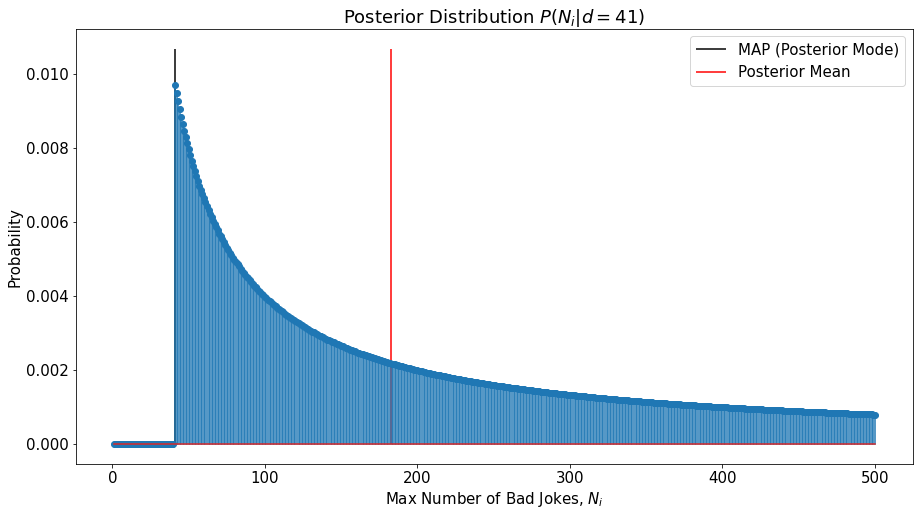

In [4]:
# Full Posterior Distribution
plt.stem(df_posterior["posterior"].index, df_posterior["posterior"])


# Maximum A-Posteriori (MAP) Estimate
plt.vlines(x=N_MAP, ymin=0, ymax=np.max(df_posterior["posterior"])*1.1, label="MAP (Posterior Mode)")


# Mean of the Posterior
plt.vlines(x=N_MEAN, ymin=0, ymax=np.max(df_posterior["posterior"])*1.1, color="red", label="Posterior Mean")

plt.xlabel("Max Number of Bad Jokes, $N_i$")
plt.ylabel("Probability")
plt.title(f"Posterior Distribution $P(N_i | d = {observation[0]})$")
plt.legend()
plt.show()

In [5]:
# Add Credibility Intervals 
def get_credibility_intervals(df: pd.DataFrame, 
                              cred_level: float = 0.95) -> tuple:
    df = df.sort_index(ascending=True)
    df = df.assign(**{"cdf": lambda x: x["posterior"].cumsum()})
    boundry = (1 - cred_level)/2
    credible_interval = (df["cdf"] >= boundry) & (df["cdf"] <= 1 - boundry)
    (cred_max, cred_min) = (df[credible_interval].index.min(), 
                            df[credible_interval].index.max()
                           )
    
    print(f"{cred_level*100}% Credibility Interval is {(cred_max, cred_min)}")
    return (cred_max, cred_min)


print(get_credibility_intervals(df_posterior))

95.0% Credibility Interval is (43, 469)
(43, 469)
